

# GOURMET GURU RESTAURANT RECOMMENDER SYSTEM
***

## 1. BUSINESS UNDERSTANDING
***

### 1.1 Overview

The U.S. dining industry is rich and varied, yet locals and tourists often find it difficult to discover restaurants that meet their specific preferences. The abundance of options, without a centralized platform for personalized recommendations, complicates the decision-making process. Our system addresses this by offering tailored dining suggestions, enhancing user experience and supporting local businesses.


### 1.2 Stakeholder Definition

- The main stakeholder in this project is Gourmet Guru,a start up aiming to venture into the restaurant recommendation business.

They have contracted us,Digital Delight to handle the tech part of things and build a recommender app.

Other indirect stakeholers who will benefit from this project are:

•	Users: Individuals seeking personalized dining recommendations based on their unique preferences.

•	Restaurant Owners: Local businesses aiming to attract targeted customers and increase foot traffic.



### 1.3 PROBLEM STATEMENT

As the dining industry expands, consumers are overwhelmed by the numerous restaurant options, making it difficult to find establishments that match their preferences. The absence of a centralized platform for personalized recommendations complicates decision-making, especially for those in unfamiliar areas. Existing solutions are too generalized and lack real-time, location-based suggestions. As the dining scene diversifies, there's an urgent need for an intelligent recommender system to provide tailored, real-time dining suggestions, enhancing the overall experience.


### 1.4 OBJECTIVES

#### 1.4.1 Main Objective

Develop a user-friendly restaurant recommender system that provides personalized, real-time suggestions based on user location and cuisine preferences. The system will utilize various data sources to ensure accurate and relevant recommendations.


#### 1.4.2 Specific Objectives


- **Optimize Recommendations for Popular Ratings**

 Focus on recommending restaurants with ratings around 4.0 and 5.0 stars, and ensure that recommendations highlight top-rated restaurants to leverage high review counts and positive experiences.
 
 
- **Filter Out Closed Restaurants**

Implement robust filtering mechanisms to exclude closed restaurants from recommendationsand ensure that the system only recommends active, operational establishments to improve reliability and user satisfaction.

- **Leverage Seasonal Trends in Recommendations**

Objective: Adjust recommendations and promotional activities to align with seasonal peaks in customer engagement,


- **Target Major Restaurant Markets**

Objective: Prioritize data and recommendations for states with the highest numbers of restaurants


- **Create an intuitive, responsive web and mobile application.**


### 1.5 Proposed Solution

We propose developing a Restaurant Recommender System specifically for the United States.This system will help with:

•	Comprehensive Categorization: Systematically  categorize restaurants in the United States, grouping them by cuisine type, location, and other relevant factors.

•	Personalized Recommendations: Enable users to input their current location and preferred cuisine type, delivering a ranked list of nearby restaurants based on their ratings and proximity.

•	Enhanced User Experience: Offer an intuitive, user-friendly interface with integrated map features to simplify navigation and help users easily explore and select dining options.


### 1.6 Metrics of success

Metrics of Success will include:

- RMSE : This will  measure the average magnitude of the errors between predicted values and actual values, providing an indication of how well a model performs. 

•	User Engagement: Measured by the number of active users, frequency of use, and user retention rates.

•	Recommendation Accuracy: Evaluated through user feedback and satisfaction scores, focusing on how well the recommendations match user preferences.



### 1.7 Challenges

Some of the challenges we may experience during this project include:

- Data Collection and Quality: Ensuring the platform has access to accurate and up-to-date restaurant data is crucial, as incomplete or outdated information can lead to poor recommendations and user dissatisfaction.


- Scalability: As the user base and the number of restaurants grow, the platform must efficiently handle increased data processing and maintain real-time performance across various states, ensuring a seamless user experience.


- Competition: Differentiating the platform from established competitors like Yelp and TripAdvisor is essential. The platform needs to offer unique value propositions to attract users in a crowded market.


- Privacy and Data Security: Protecting user data and ensuring compliance with privacy regulations is a significant challenge. Building trust with users regarding data usage is vital to maintaining their engagement and loyalty.




***
## 2. DATA UNDERSTANDING
***
The data used in this project was sourced by the stakeholders from [YELP](https://www.yelp.com/dataset/download). It is a collective dataset of various businesses and user information gotten from Yelp's website. It contains 6,990,280 reviews, 150,346 businesses, 200,100 pictures across 11 metropolitan areas and 19 states. 
The original data was filtered by concentrating only on restaurant businesses and on reviews made within the year and split into two datasets as shown 
[here](Preliminary_notebook.ipynb).

The two datasets have information on 
> 1. Restaurant Informational Data
> 2. User Review Data

Data Understanding on the two datasets are as follows::

In [1]:
# importing libraries
import os
import re
import sys
import pickle
import numpy as np
import pandas as pd
from classes.understanding import DataLoader, DataChecks, DataInfo
from classes.EDA import UnivariateAnalysis, BivariateAnalysis, ComprehensiveEDA, UserEDA

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Text processing 
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning and model selection
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD, accuracy, NormalPredictor,NMF
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split 

# Deep learning with TensorFlow
from tensorflow.keras import models, layers, optimizers, losses, regularizers, metrics


#### i) Restaurant Informational Data

In [2]:
# Instantiate the DataLoader class
loader= DataLoader()

# Instantiate the DataInfo class
summary= DataInfo()

In [3]:
# Reading the restaurants csv file
restaurant_data= loader.read_data("data/restaurants.csv")

# Summary information on the restaurant df
print(f'\nRESTAURANT DATASET INFORMATION\n' + '=='*20 + '\n')
summary.info(restaurant_data)


RESTAURANT DATASET INFORMATION

Shape of the dataset : (52286, 14) 

Column Names
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object') 
 

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       51843 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52265 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720

,latitude,longitude,stars,review_count,is_open
count,52286.000000,52286.000000,52286.000000,52286.000000,52286.000000
mean,36.997663,-87.845038,3.515234,87.241078,0.669472
std,6.010943,13.813532,0.829585,188.912445,0.470408
min,27.564457,-120.083748,1.000000,5.000000,0.000000
25%,32.217586,-90.233506,3.000000,13.000000,0.000000
50%,39.484140,-86.035621,3.500000,33.000000,1.000000
75%,39.958370,-75.337533,4.000000,89.000000,1.000000
max,53.679197,-74.664459,5.000000,7568.000000,1.000000


Dataset Overview


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN


### Restaurant Dataset Column Descriptions
***

| Column Name     | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| business_id     | Unique identifier for the business.                                         |
| name            | Name of the business.                                                       |
| address         | Street address of the business.                                             |
| city            | City where the business is located.                                         |
| state           | State where the business is located.                                        |
| postal_code     | Postal code (ZIP code) of the business location.                            |
| latitude        | Latitude coordinate of the business location.                               |
| longitude       | Longitude coordinate of the business location.                              |
| stars           | Average star rating of the (typically on a scale of 1 to 5).       |
| review_count    | Number of reviews the business has received.                                |
| is_open         | Indicator of whether the business is currently open (1 = open, 0 = closed). |
| attributes      | Additional attributes of the business (e.g., "WiFi: free", "HasTV: true").  |
| categories      | List of categories the business belongs to (e.g., "Restaurants", "Bars").   |
| hours           | Business hours (e.g., "Monday: 8am-5pm, Tuesday: 8am-5pm").                 |


In [4]:
# Instantiating Datachecks for restaurant df
checks= DataChecks(restaurant_data)

# Checking for duplicates
checks.check_duplicates()

NO DUPLICATES FOUND


In [5]:
# Checking for null values in restaurant dataset
checks.check_missing()

,Column Names,Missing Values,Percentage Missing
0,address,443,0.847263
1,postal_code,21,0.040164
2,attributes,566,1.082508
3,hours,7279,13.921509


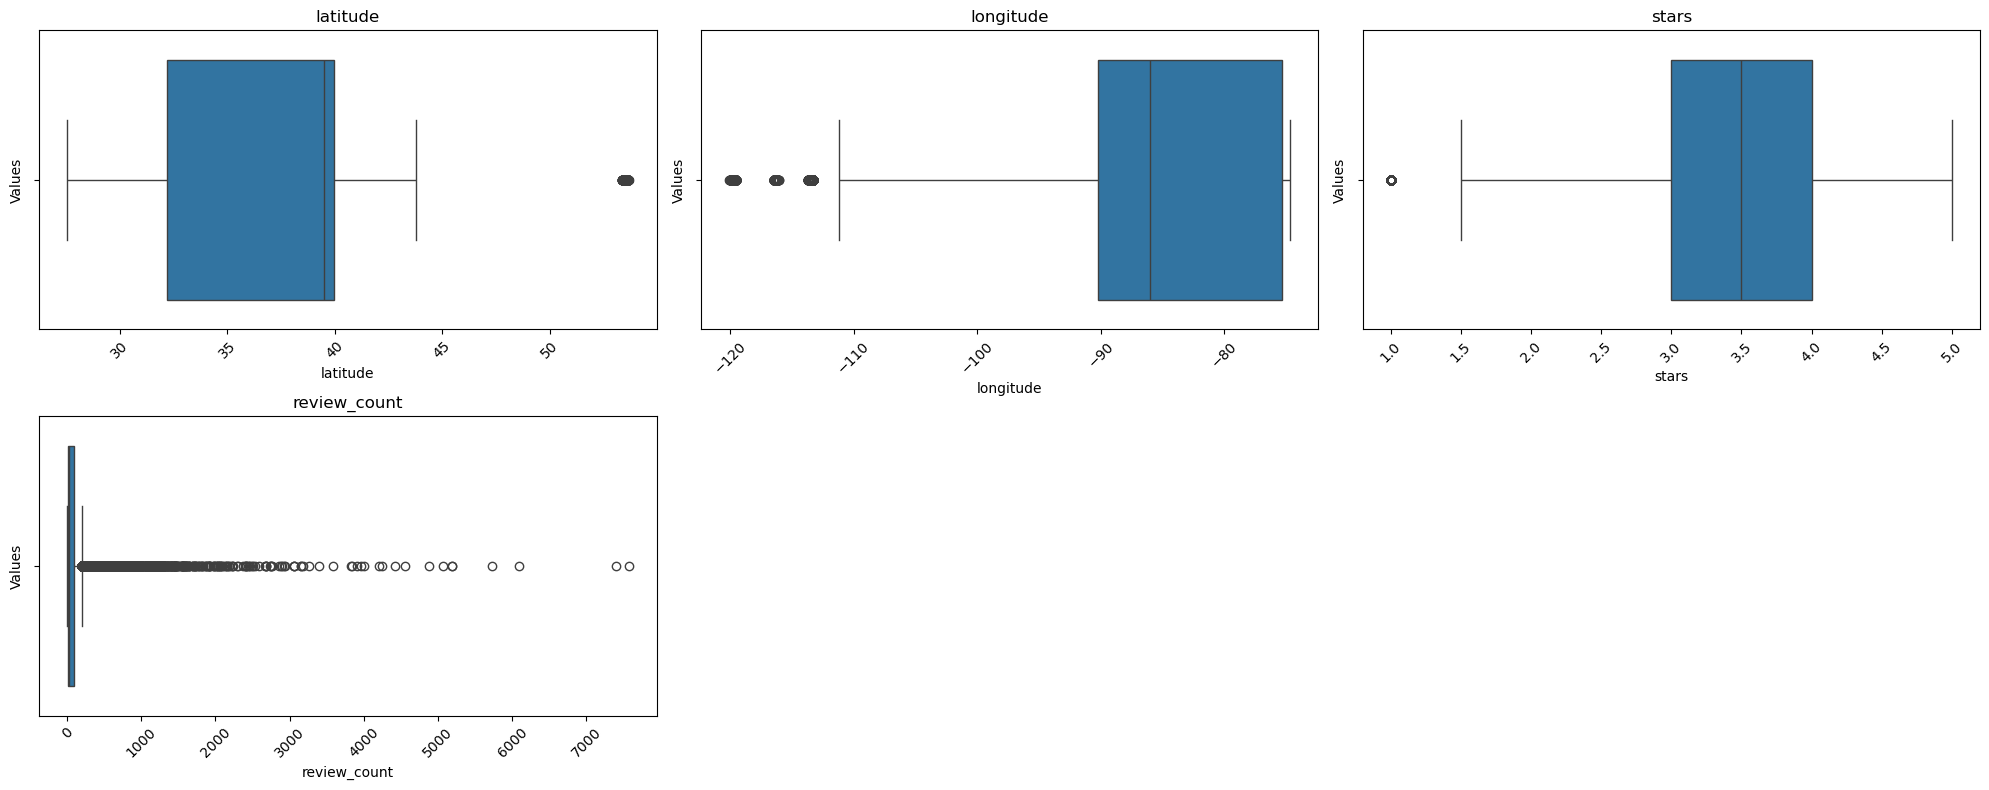

In [6]:
# check for outliers in restaurant dataset
checks.check_outliers_and_plot()

***
**Initial Observations on restaurant information data**
***
- > Restaurant information dataset has 52286 rows and 14 columns.
- > All business locations are in the North West hemisphere i.e. USA based on min and max latitude and longitude.
- > The address, 	postalcode, attributes and hours columns contain missing values and will be addressed.
- > There are no duplicated rows.
- > Majority of the businesses receive between 3-4 stars on average.
- > No significant outliers can be seen.urs

#### ii) User Review Data

In [7]:
# Loading the users csv file
users_data= loader.read_data("data/users.csv")

# Summary information on the user review data
print(f'\nUSER DATASET INFORMATION\n' + '=='*20 + '\n')
summary.info(users_data)


USER DATASET INFORMATION

Shape of the dataset : (2559586, 4) 

Column Names
Index(['user_id', 'business_id', 'stars', 'date'], dtype='object') 
 

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559586 entries, 0 to 2559585
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   business_id  object
 2   stars        int64 
 3   date         object
dtypes: int64(1), object(3)
memory usage: 78.1+ MB

Descriptive Statistics


,stars
count,2.559586e+06
mean,3.837496e+00
std,1.450423e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


Dataset Overview


,user_id,business_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11
1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15
2,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,2018-07-17 03:30:07


### Users Reviews Dataset Column Descriptions
***
| Column Name  | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| review_id    | Unique identifier for the review.                                           |
| user_id      | Unique identifier for the user who wrote the review.                        |
| business_id  | Unique identifier for the business that the review is associated with.      |
| stars        | Star rating given by the user in the review (on a scale of 1 to 5).         |
| useful       | Count of how many users found the review useful.                            |
| funny        | Count of how many users found the review funny.                             |
| cool         | Count of how many users found the review cool.                              |
| text         | The content of the review written by the user.                              |
| date         | Date when the review was written.                                           |


In [8]:
# Instantiating Datachecks for users df
checks= DataChecks(users_data)

# Checking for duplicates for users df
checks.check_duplicates()


,user_id,business_id,stars,date
988470,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2,2018-07-23 21:43:33
997259,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2,2018-07-23 21:43:33
1980862,xZ0ioQJ0Jyo_Uc0FzmyFQQ,O_kAd89gPls-dXda40NWzA,5,2019-11-22 07:18:46
2005725,xZ0ioQJ0Jyo_Uc0FzmyFQQ,O_kAd89gPls-dXda40NWzA,5,2019-11-22 07:18:46


In [9]:
# Checking for null values in users df
checks.check_missing()

NO NULL VALUES FOUND


In [10]:
# check for outliers in users df
checks.check_outliers_and_plot()

NO OUTLIERS FOUND


***
**Initial Observations on user review data**
***
> The user review dataset contains 2559586 rows and 4 columns

> There is evidence of duplicated data and would require cleaning

> There are no null values in the dataset.

> Majority of users rate restaurants between 3 and 4 stars

> useful, funny and cool columns do not seem to show any relevant information

***
## Exploratory Data Analysis Using `EDA.py` Classes
***

In this section of the notebook, we will initiate the exploratory data analysis by instantiating the classes defined in our `EDA.py` script. These classes are designed to facilitate the visualization of various features within the `restaurants.csv` dataset, aiding in our understanding of the data's structure and trends.

The analysis is split between:

    i)  Univartiate Analysis of restaurant data
    
    ii) Bivariate analysis  of restaurant data

    iii) Analysis on User Reviews data

In [11]:
# Append the path where the EDA modules are located to sys.path
sys.path.append(os.path.abspath('EDA'))


### i) Univariate Analysis of Restaurant data
***

We first perform our univariate EDA on the `restaurants.csv` dataset to examine each variable independently. 


- **Star Ratings (`stars`)**: Histogram of star ratings offer insights into the overall quality as perceived by customers, helping identify general satisfaction levels.
- **State Distribution (`state`)**: Bar charts showing the number of restaurants per state reveal geographical market saturation and potential areas for business expansion.
- **Operational Status (`is_open`)**: Pie charts of open vs closed status provide a snapshot of the business landscape, indicating the proportion of actively operating restaurants.


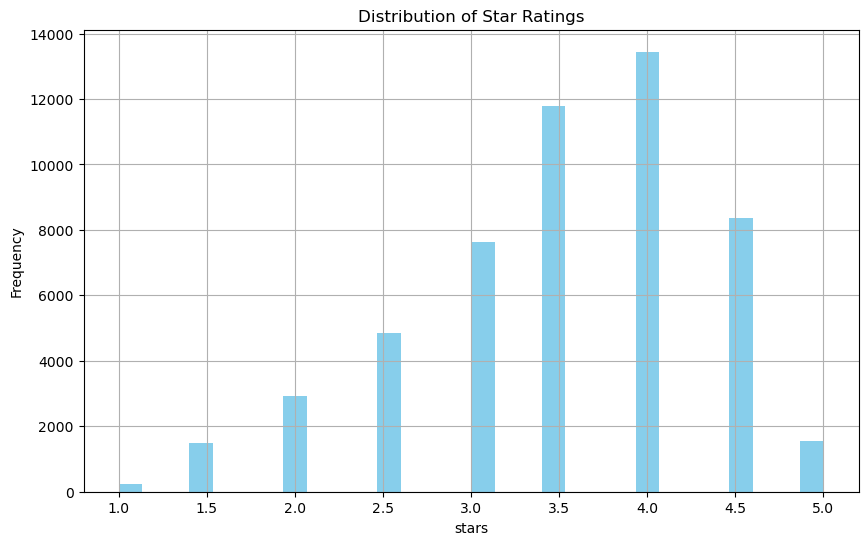

In [12]:
# Instantiate the UnivariateAnalysis class with the DataFrame
uni_analysis = UnivariateAnalysis(restaurant_data)

# Plotting the histogram of review counts
uni_analysis.plot_histogram('stars', 'Distribution of Star Ratings')

**Observations**
***

Most common ratings are 4.0 and 3.5 stars, indicating general satisfaction.

Ratings below 2.5 stars are uncommon, showing few very poor experiences.

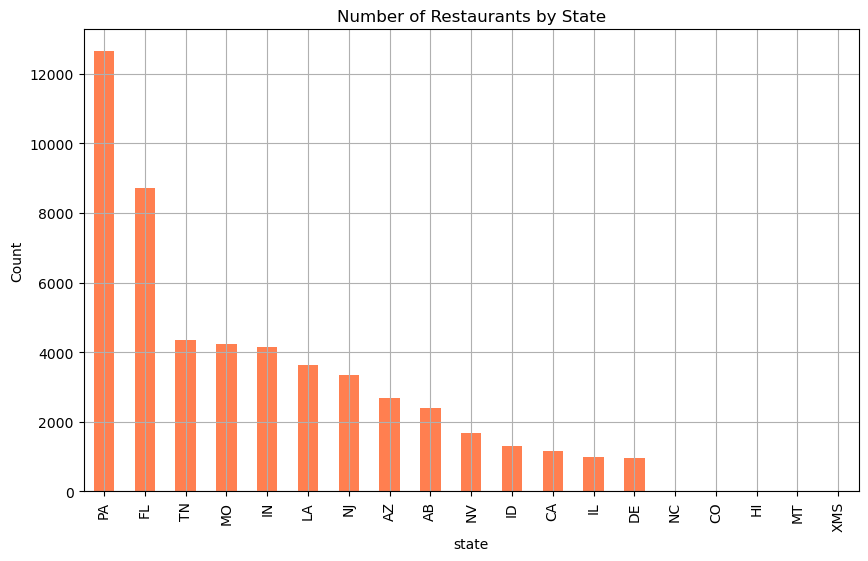

In [13]:
# Plotting the bar chart for the number of restaurants by state
uni_analysis.plot_bar_chart('state', 'Number of Restaurants by State')

**Observations**
***

Pennsylvania (PA), Florida (FL) and Tennessee (TN) boast the highest numbers of restaurants among the states, highlighting them as major markets for the restaurant industry. 

Conversely, there is a noticeable decrease in restaurant counts moving from left to right in the graph. States like North Carolina (NC), Colorado (CO), Hawaii (HI), and Montana (MT) demonstrate lack of a complete dataset in these regions. 

Understanding these patterns can help tailor location-based strategies in the restaurant recommendation system to optimize user experiences and business growth.

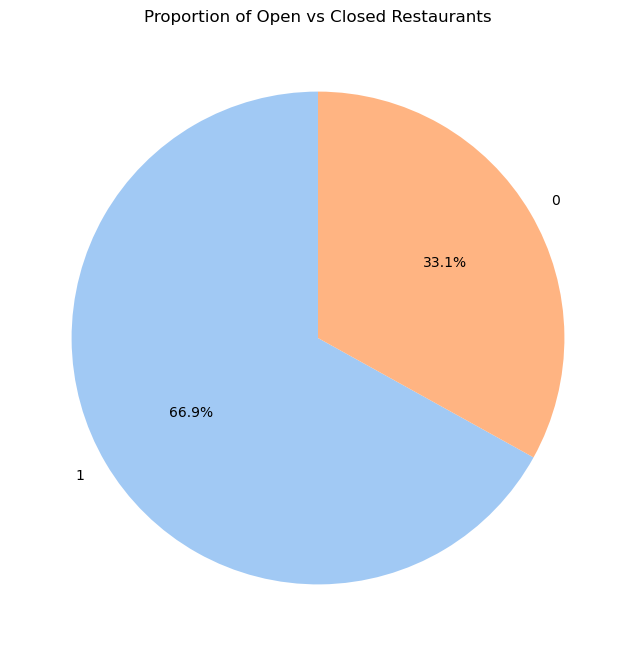

In [14]:
# Plotting the pie chart for the proportion of open vs closed restaurants
uni_analysis.plot_pie_chart('is_open', 'Proportion of Open vs Closed Restaurants')

**Observations**
***

- **66.9% Open Restaurants**: A significant majority of the restaurants in our dataset are currently operational. This proportion suggests a robust industry where the majority of listed entities are active, presenting numerous options for recommendations.

- **33.1% Closed Restaurants**: A substantial portion of the restaurants are no longer in operation. This data is crucial for ensuring accuracy in our recommendation system by filtering out closed establishments, thereby improving user experience and system reliability.

**Strategic Recommendations:**
***
 Regular updates and verification processes are necessary to maintain the accuracy of the system, ensuring that closed restaurants are removed from active recommendation lists.


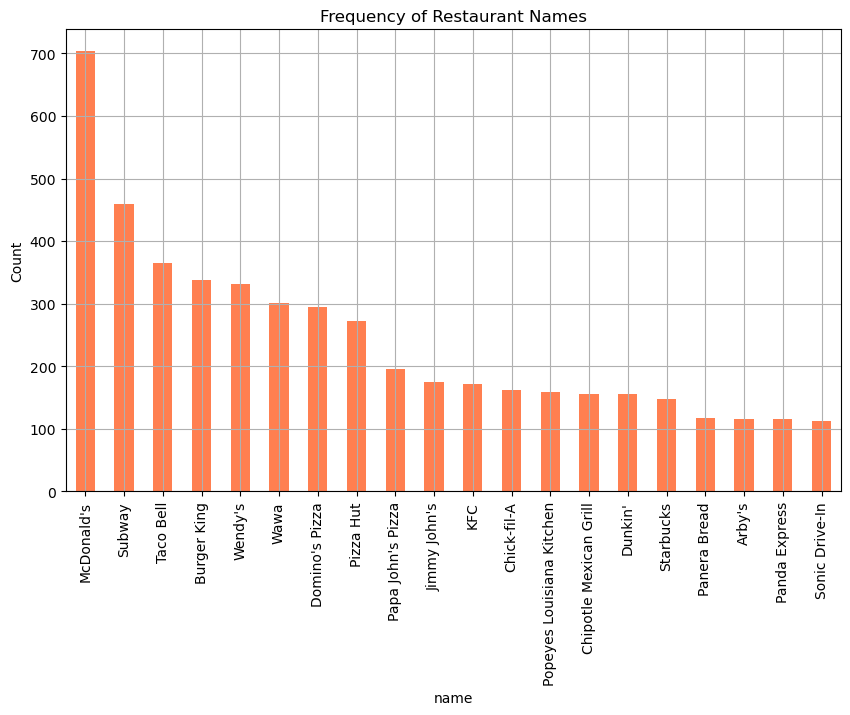

In [15]:
# Plot on most common restaurant names in dataset
uni_analysis.plot_bar_chart('name', 'Frequency of Restaurant Names', limit=20)

**Observations**
***

McDonald's, Subway, and Taco Bell lead in frequency, indicating a high presence of these chains within the dataset. This suggests a dominance of fast-food chains in the restaurant landscape.

The frequency of well-known names like Wendy's, Domino's Pizza, and Pizza Hut reflects their popularity, which can be leveraged in recommending familiar choices to users of the recommendation system.

**Strategic Implications**: 
***

Understanding which brands are most common can help tailor marketing strategies within the recommendation system, highlighting promotions, deals, or new menu items from these popular chains.


### ii) Bivariate Analysis of the Restaurant Data
***

In this section, we use the `BivariateAnalysis` class to explore relationships between pairs of variables in the `restaurants.csv` dataset. By examining these relationships, we aim to uncover patterns and correlations that can inform better decision-making for restaurant recommendations and business strategies.



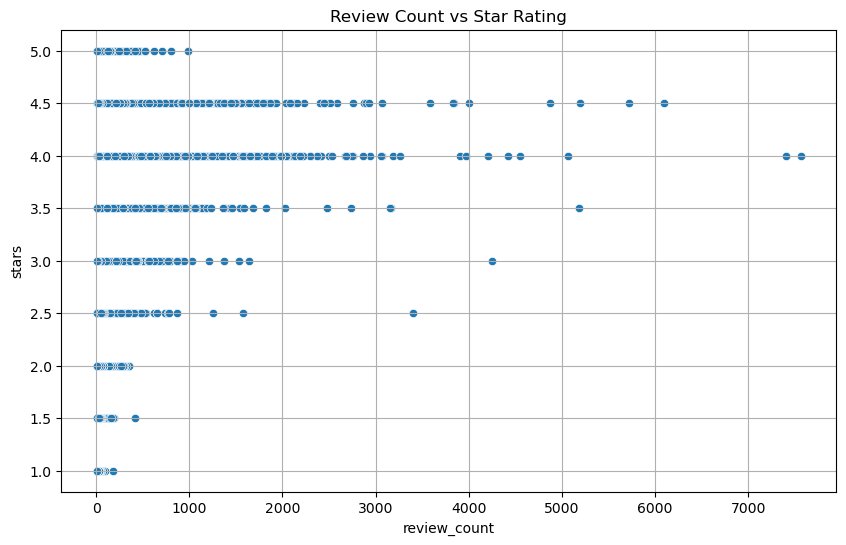

In [16]:
# Instantiate the BivariateAnalysis class with the DataFrame
bi_analysis = BivariateAnalysis(restaurant_data)

# Plotting the scatter plot to explore correlations between review counts and star ratings
bi_analysis.plot_scatter('review_count', 'stars', 'Review Count vs Star Rating')

**Observations**
***

 Higher review counts are more commonly associated with mid to high ratings (3.0 to 5.0 stars).

The highest review counts appear at 4.0 and 5.0 star ratings, suggesting high customer engagement with top-rated restaurants.

Restaurants with ratings between 1.0 and 2.5 stars tend to have fewer reviews, indicating less engagement or fewer customers.

The vertical spread at each rating level, especially at high ratings, indicates variability in the popularity of restaurants with similar ratings.


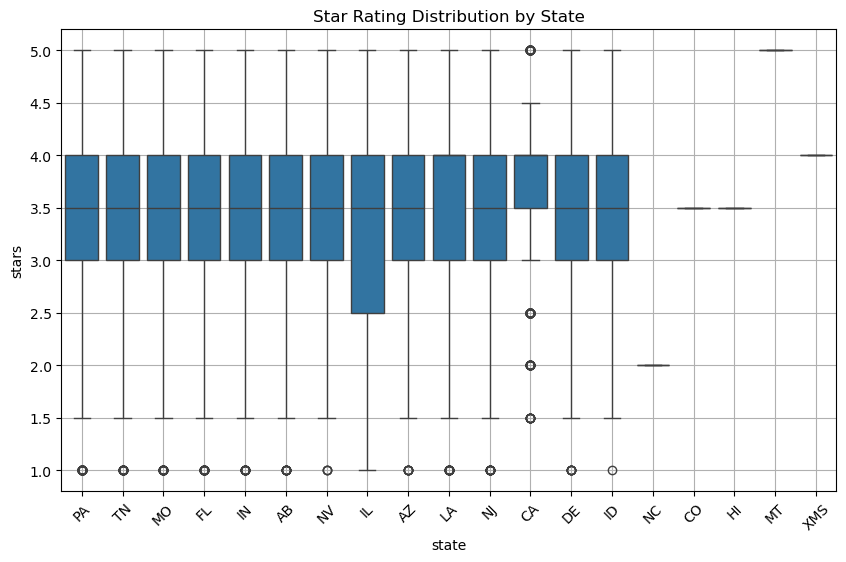

In [17]:
# Plotting the boxplot to analyze how star ratings vary across different states
bi_analysis.plot_boxplot('state', 'stars', 'Star Rating Distribution by State')

**Observations**
***
Most states, including Pennsylvania (PA), Tennessee (TN), Missouri (MO), Florida (FL), and New York (NY), show a tight clustering around the median star rating (between 3.5 and 4.0), suggesting a general consistency in customer satisfaction.
  

States like California (CA), Idaho (ID), North Carolina (NC), and Colorado (CO) display significant variability in their ratings with outliers indicating both exceptionally high and low ratings. This suggests a diverse range of restaurant experiences.

Hawaii (HI) and Montana (MT) show a broader spread in ratings, which could indicate inconsistency in restaurant quality or varied customer expectations.





### iii) Analysis on User Reviews data
***

Next, we'll perform EDA on the users.csv dataset. The analysis will help in enhancing our understanding of the user dynamics within our platform, guiding strategic decisions and improvements.
This analysis centered on the distribution of ratings across users and a trend analysis on frequency of reviews

In [18]:
# Instantiate the ComprehensiveEDA class with the users DataFrame
eda_users = ComprehensiveEDA(users_data)

# Instantiate the UserEDA class specifically designed for user-related data analysis
user_eda = UserEDA(users_data)

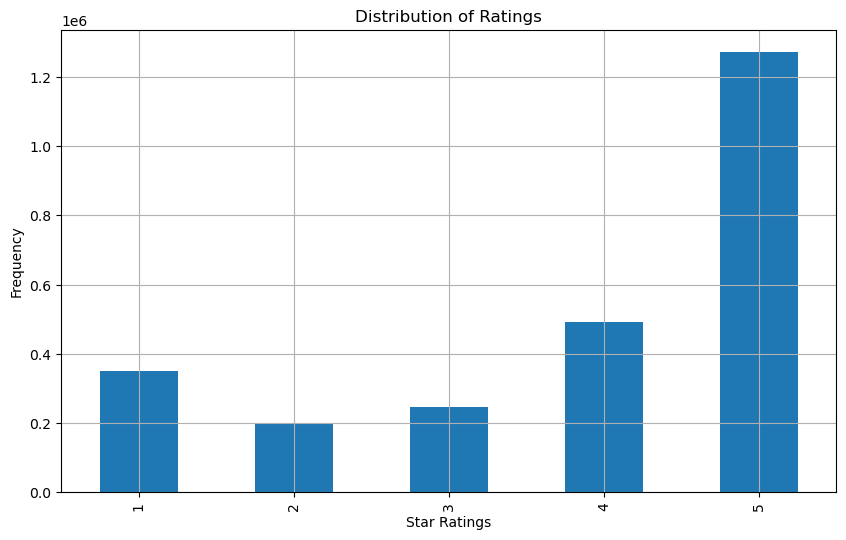

In [19]:
# plotting the rating distribution
user_eda.plot_rating_distribution()

**Observations**
***
The distribution of ratings from the users.csv dataset reveals a notable preference for higher ratings, with 5-star ratings significantly more frequent than others. 

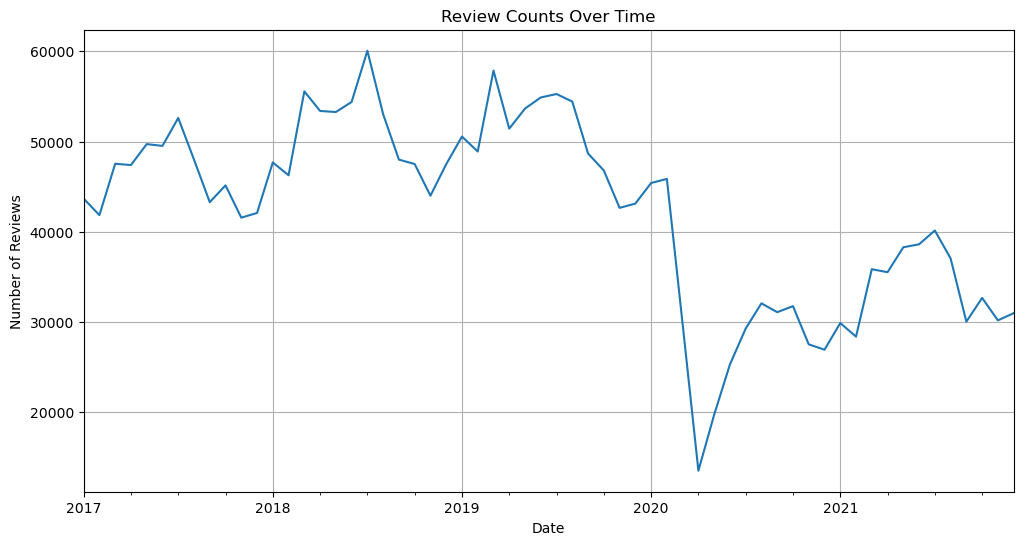

In [20]:
# Plotting reviews over time
user_eda.plot_reviews_over_time()

**Observations**
***

- **Seasonal Trends**: Frequent peaks between April and July, indicating increased customer engagement during this period.
- **Decline in Engagement**: Noticeable drops in reviews occur after July, particularly in September and December.
- **Covid Impact**: Evidence of declined restaurnat reviews in the year 2020 due to the COVID outbreak
- **Impact on our Recommender System**:
  - Incorporate seasonality into recommendations.
  - Optimize timing for promotional activities based on review trends.
  


***
## 3.DATA PREPARATION
***

We will clean, and transform diverse data sources, including restaurant attributes, cuisine, and historical interactions. Ensuring data quality and consistency is essential for accurate model training. The prepared dataset forms the foundation for building a robust and personalized recommendation engine."




#### i) User Review Data
***


In [21]:
# Checking the duplicates in the user data
checks= DataChecks(users_data)
checks.check_duplicates()

,user_id,business_id,stars,date
988470,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2,2018-07-23 21:43:33
997259,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2,2018-07-23 21:43:33
1980862,xZ0ioQJ0Jyo_Uc0FzmyFQQ,O_kAd89gPls-dXda40NWzA,5,2019-11-22 07:18:46
2005725,xZ0ioQJ0Jyo_Uc0FzmyFQQ,O_kAd89gPls-dXda40NWzA,5,2019-11-22 07:18:46


In [22]:
# Dropping the duplicates
users_data_cleaned= users_data.drop_duplicates()

# Confirming the duplicates have been dropped
checks= DataChecks(users_data_cleaned)
checks.check_duplicates()

NO DUPLICATES FOUND


In [23]:
#Checking the first five rows fot the user_data
users_data_cleaned.head()

,user_id,business_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11
1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15
2,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,2018-07-17 03:30:07
3,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5,2017-02-19 13:32:05
4,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,2017-01-02 03:17:34


In [24]:
# Checking information
users_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2559584 entries, 0 to 2559585
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      object        
 1   business_id  object        
 2   stars        int64         
 3   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 97.6+ MB


 **Observations**
 ***
 
> The duplicated rows were dropped in preparation for modelling.

> The data has 2,559,584 rows and 4 columns.

#### ii) Restaurant Informational Data
***

In [25]:
# Looking into the first five rows of the data frame
restaurant_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [26]:
# Checking for null values in the dataset
restaurant_data.isna().sum()

business_id        0
name               0
address          443
city               0
state              0
postal_code       21
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       566
categories         0
hours           7279
dtype: int64

**Observation**
***

The dataset contains null values in the columns: address, postal code, attributes and hours

In [27]:
# Dropping null values
restaurant_data = restaurant_data.dropna(subset=['attributes'])

In [28]:
# Filling missing values in the 'attributes' column with 'Unknown'
restaurant_data[['address','postal_code','hours']]=restaurant_data[['address','postal_code','hours']].fillna('Unknown')

# Verifying that all missing values have been handled
restaurant_data.isnull().sum()


business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

**Observations**
***
 There were some missing values in the `attributes`, `address`, `postal_code`, and `hours` columns.
 
 We handled the missing data in two ways:
 
 1) **Dropping the records with null values**

- Rows with missing `attributes` were removed as this column is critical for analysis.

2) **Imputation**

- Missing values in `address`, `postal_code`, and `hours` were imputed  with 'Unknown' to maintain data integrity.

In [29]:
# Checking the value counts for the states
restaurant_data.state.value_counts()

state
PA     12538
FL      8632
TN      4297
MO      4219
IN      4119
LA      3596
NJ      3302
AZ      2635
AB      2355
NV      1657
ID      1290
CA      1151
IL       975
DE       949
NC         1
CO         1
HI         1
MT         1
XMS        1
Name: count, dtype: int64

In [30]:
# States labeled `XMS` will be filtered out, as they do not seem valid
valid_states = ['XMS','MT','NC','HI','CO',]
restaurant_data_filtered = restaurant_data[~restaurant_data['state'].isin(valid_states)]


In [31]:
# Map state abbreviations to full state names
state_abbreviations = {
    'AB': 'Alberta', 'AZ': 'Arizona', 'CA': 'California', 'DE': 'Delaware', 'FL': 'Florida', 'ID': 'Idaho','IL': 'Illinois',
    'IN': 'Indiana','LA': 'Louisiana',  'MO': 'Missouri','NV': 'Nevada', 'NJ': 'New Jersey','PA': 'Pennsylvania',  'TN': 'Tennessee', 
}
# Replace state initials with full names
restaurant_data_filtered['state'] = restaurant_data_filtered['state'].map(state_abbreviations)



**Observation**
***

- States labeled XMS,MT,NC,HI and Co were noted in the EDA for having unusually small restaurant counts, upon confirmation, they have been filtered  out as they contain only a value of one restaurant per state therefore not statistically relevant to our project.

- The state abbreviations have been successfully mapped to their corresponding full state names, providing more clarity,simplicity,coherence and consistency in the data.

### FEATURE ENGINEERING
***

We will continue with feature engineering with the following steps
1. Exploding the categories to refine out cuisine list.
2. Elimiating spaces that arise from the splits.
3. Engineering a Location column that is a combination of various features.
4. Filtering the attributes column to keep only attributes that are true.
 

In [32]:
# Exploding the categories column to ensure each category is handled separately
df_exploded = restaurant_data_filtered.assign(categories=restaurant_data_filtered['categories'].str.split(',')).explode('categories')

df_exploded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Restaurants,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Food,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Bubble Tea,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Coffee & Tea,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",Bakeries,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [33]:
# Function to standardize spacing
def standardize_spacing(x):
    if isinstance(x, str):
        return re.sub(r'\s+', ' ', x.strip())
    return x

# Apply the function to all elements in the DataFrame
df_exploded = df_exploded.applymap(standardize_spacing)

In [34]:
# List of all the Cuisine in the categories
cuisine=["American(New)", "Mexican",'American (Traditional)','Italian','Chinese',
         'Japanese','Asian Fusion','Mediterranean','Southern','Cajun/Creole','Tex-Mex',
         'Thai','Latin American','Indian','Vietnamese','Greek','Caribbean','Middle Eastern',
         'French','Korean','Halal','Spanish','Canadian (New)','Irish','Pakistani','Hawaiian',
         'Soul Food','German','Szechuan','African','Filipino','Lebanese','Puerto Rican','Turkish',
         'Cantonese','British','Peruvian','Kosher','Brazilian','Pan Asian','Taiwanese','Cuban','Colombian',
         'Ethiopian','Venezuelan','Salvadoran','Laotian','Polish','Dominican','Russian','Persian/Iranian',
         'Afghan','Moroccan','Arabic','Portuguese','Mongolian','Argentine','Malaysian','Belgian',
         'Honduran','Himalayan/Nepalese','Armenian','Trinidadian','Ukrainian','Australian','Egyptian']

# Filtering to get restaurants with cuisine
restaurant_exploded = df_exploded[df_exploded.categories.isin(cuisine)]

In [35]:
# Display the 'location' column to check the combined addresses
restaurant_exploded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,Missouri,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...",Italian,Unknown
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,Missouri,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...",American (Traditional),Unknown
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,Missouri,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...",Greek,Unknown
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Unknown,Tampa Bay,Florida,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",Vietnamese,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
5,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,Indiana,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...",American (Traditional),"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


In [36]:
# combining the address columns into a location column
restaurant_exploded['location']=restaurant_exploded[['city','state','address']]\
            .apply( lambda x: f"State:{x['state']}, City:{x['city']}, Address:{x['address']} ", axis=1)


# viewing the restaurant_exploded dataset information
restaurant_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38528 entries, 2 to 52285
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   38528 non-null  object 
 1   name          38528 non-null  object 
 2   address       38528 non-null  object 
 3   city          38528 non-null  object 
 4   state         38528 non-null  object 
 5   postal_code   38528 non-null  object 
 6   latitude      38528 non-null  float64
 7   longitude     38528 non-null  float64
 8   stars         38528 non-null  float64
 9   review_count  38528 non-null  int64  
 10  is_open       38528 non-null  int64  
 11  attributes    38528 non-null  object 
 12  categories    38528 non-null  object 
 13  hours         38528 non-null  object 
 14  location      38528 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.7+ MB


**Observations**
***
 
- The `categories` column have been standardized and exploded to handle multiple categories per restaurant. This transformation is necessary to accurately categorize each restaurant's offerings, which is essential for matching user preferences with the right restaurants.

- The exploded DataFrame has been filtered to include only rows with specified cuisines. By narrowing down to specific cuisines, we ensure that the recommender system focuses on the most relevant restaurant types. This helps in improving precision

- Combining the `state`, `city`, and `address` columns is vital for geographic-based recommendations, enabling the system to suggest restaurants within a user’s preferred or current location.

- This results in a dataset with 38,528 rows of restaurants with their cuisine types and 15 columns

In [37]:
def decompress(x):
    """
    The function takes in a dictionary and returns only the keys that have their values not being False   
    """
      
    list_ = []
    
    # Check if x is a string
    if not isinstance(x, str):
        return ' '
    
    # evaluate the attributes column to convert it from a string to a dictionary
    try:
        data_dict = eval(x)
    except Exception as e:
        print(f"Error evaluating {x}: {str(e)}")
        return ' '
    
    # iterate through the key-value pairs in the dictionary
    for key, val in data_dict.items():
        # check if the key is in the specified categories and if the value is not "None"
        if (key in ['Ambience', 'GoodForMeal', 'BusinessParking']) and (val != "None"):
            # if conditions are met, further iterate through sub-dictionary
            try:
                sub_dict = eval(val)
                for key_, val_ in sub_dict.items():
                    # if the sub-dictionary value is true, append it to the list
                    if val_:
                        list_.append(f'{key}{key}')
            except Exception as e:
                print(f"Error evaluating {val}: {str(e)}")
        else:
            # if the value is not false, append the key to the list
            if val != 'False':
                list_.append(key)
    
    # join the list of selected attribute names into a space-separated string
    return " ".join(list_)

# create a new column 'attributes_true' in the df by applying the decompress function
# include a condition to handle cases where attributes is 'Not-Available'
restaurant_exploded['attributes_true'] = restaurant_exploded.attributes.apply(lambda x: decompress(x) if x != 'Not-Available' else ' ')

In [38]:
# Example to show the new column generated using a sample business_id
# Temporarily set display options
pd.set_option('display.max_colwidth', None)  

# Display the attributes sections
print("Original Attributes Column",restaurant_data[restaurant_data.business_id=='k0hlBqXX-Bt0vf1op7Jr1w'].attributes[:1])
print("Attributes_true Column",restaurant_exploded[restaurant_exploded.business_id=='k0hlBqXX-Bt0vf1op7Jr1w'].attributes_true[:1])

# Reset display options to default after viewing
pd.reset_option('display.max_colwidth')


Original Attributes Column 2    {'Caters': 'True', 'Alcohol': "u'full_bar'", 'RestaurantsAttire': "u'casual'", 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'NoiseLevel': "u'average'", 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'True', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}", 'RestaurantsPriceRange2': '1', 'GoodForKids': 'True', 'WiFi': "u'free'", 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'True'}
Name: attributes, dtype: object
Attributes_true Column 2    Caters Alcohol RestaurantsAttire RestaurantsTakeOut HasTV NoiseLevel BusinessAcceptsCreditCards OutdoorSeating BusinessParkingBusinessParking RestaurantsPriceRange2 GoodForKids WiFi RestaurantsGoodForGroups
Name: attributes_true, d

In [39]:
# Checking the shape of the dataset
restaurant_exploded.shape

(38528, 16)

**Observations:**
***
- By using the compress function, the attributes column was stripped of any attributes that were False and a new column attributes true was created that only had the true attributes of each restaurant

- This results in a dataset with 38,528 rows of restaurants with their cuisine types and 16 columns

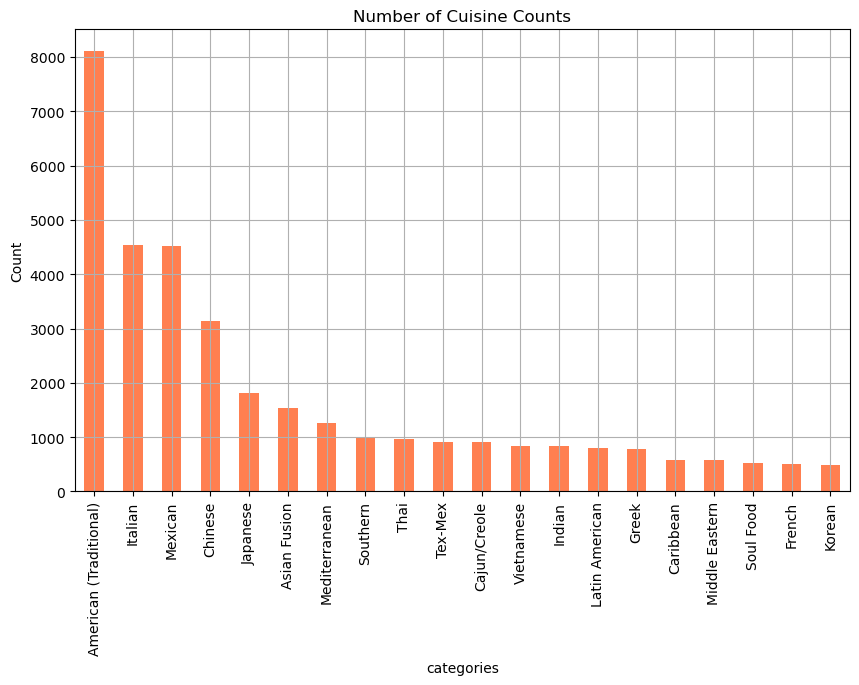

In [72]:
# Instantiate the UnivariateAnalysis class with the DataFrame
uni_analysis = UnivariateAnalysis(restaurant_exploded)
uni_analysis.plot_bar_chart('categories', 'Number of Cuisine Counts', limit=20)

**Observations:**
***

- The majority of the restaurants mainly fall within American(Traditional), Italian, Mexican, Chinese, Japanese
- American(Traditional) was largely dominant in the dataset after splitting


In [40]:
# Save the cleaned user review data to a new CSV file
users_data_cleaned.to_csv('data/cleaned_users_data.csv', index=False)

In [41]:

# Save the filtered and transformed restaurant data to a new CSV file
with open('Pickled_files/restaurants_data.pkl','wb')as file:
    pickle.dump(restaurant_exploded, file)


***
## 4. MODELLING
***

In this section we will create a recommendation system using the datasets to solve our main problem.
There are different types of recomentation models, in this project we will focus on three types of recommentation systems

* 1. Content-Based Recommender systems
* 2. Collaborative Filtering Systems
* 3. Deep Neural Networks

Now, in each of these categories we will compare the different models and see which ones perform best. For validation and comparison we will use the RMSE (root mean squared error) metric, that is how far is the prediction from the true value.

***
##### 1. CONTENT BASED FILTERING
***
To perfrom the content based filtering, we utilized the restaurant data dataset.

The restaurant's features such as types of cuisine they offer and attribues such as WiFi, Alcohol, Happy Hour, Noise Level, Restaurants Attire, Wheelchair Accessible, Restaurants TableService etc, were able to provide information to use cosine similarity to recommend the restaurants with the closest similarity.

In [42]:
# Loading the restaurant data from the pickled file
df = pd.read_pickle('pickled_files/restaurants_data.pkl')

# Overview of dataset information to understand the features we require
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38528 entries, 2 to 52285
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   business_id      38528 non-null  object 
 1   name             38528 non-null  object 
 2   address          38528 non-null  object 
 3   city             38528 non-null  object 
 4   state            38528 non-null  object 
 5   postal_code      38528 non-null  object 
 6   latitude         38528 non-null  float64
 7   longitude        38528 non-null  float64
 8   stars            38528 non-null  float64
 9   review_count     38528 non-null  int64  
 10  is_open          38528 non-null  int64  
 11  attributes       38528 non-null  object 
 12  categories       38528 non-null  object 
 13  hours            38528 non-null  object 
 14  location         38528 non-null  object 
 15  attributes_true  38528 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 5.0+ MB


In [43]:
# Preprocessing function
def preprocess(df):
    """
    Function to preprocess the data to combine the needed features into one column
    Returns a dataframe with the combined_features columns
    """
    filtered_df=df.copy()
    # Combining the features into one column
    filtered_df['combined_features'] = (
                                        filtered_df['categories'] + " " +
                                        filtered_df['attributes_true'] 
                                        )
    # resetting the index
    filtered_df = filtered_df.reset_index(drop=True)

    # Return turns the filtered df
    return filtered_df

In [44]:
# Vectorization function
def create_feature_vectors(df):
    """
    Performing vectorization of the preprocessed categorical features 
    and combining with the numerical features
    """
    # Vectorize the combined text features
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['combined_features'])
    
    # Combine the TF-IDF matrix with numerical columns
    numerical_features = df[['stars']].values
    combined_features = np.hstack((tfidf_matrix.toarray(), numerical_features))
    
    return combined_features


Using the cosine similarity matrix we will now create a content-based recommendation system that offers recommendations to users based on the restaurant names or text words representing the specifications of their desired restaurant and attributes.

We use the cosine similarity matrix to compare similarities between different restaurants and the customer's preferences, then pick the top n similar restaurants to recommend based on his/her input.

In [45]:
# Recommendation function
def recommendation(df, state, name=None, category=None):
    """
    Creates recommendation based on name or category/cuisine using cosine similarity and filtering
    Returns a dataframe containing name, state, city, address, stars and categories
    """
    preprocessed = preprocess(df)
    
    def cuisines(cuisine=None, state=state):
        """
        Function to filter to get the recommendations based on cuisine input
        """
        preprocessed=df[df["state"]==state]
        cuisine_df = preprocessed[preprocessed['categories'] == cuisine]
        cuisine_df_sorted = cuisine_df.sort_values(by=["stars", "city"], ascending=False)
        return cuisine_df_sorted[['name', 'state', 'city', 'stars', 'address', 'categories']]
    
    if name:
        if name not in preprocessed['name'].values:
            raise ValueError(f"Restaurant with name '{name}' not found in the filtered data.")

        # Finding the index of the restaurant name
        idx = preprocessed[preprocessed['name'] == name].index[0]
        exclude_names = [name]

        # Locating the restaurant row in the preprocessed df 
        row_to_add = preprocessed.iloc[idx]
        
        # convering it to a df
        row_to_add_df = pd.DataFrame([row_to_add])     
        
        #generating a df for only the state i want to recommend in
        specific_state= preprocessed[preprocessed["state"] == state]
        
        # concatinating it to the specific state df and reseting the index
        specific_state = pd.concat([specific_state, row_to_add_df]).reset_index(drop=True)
        
        # Finding the new index for the restaurant name
        idx = specific_state[specific_state['name'] == name].index[0]
        
        # Creating feature vectors
        combined_features = create_feature_vectors(specific_state)

        # Finding the cosine similarity
        cosine_sim = cosine_similarity(combined_features, combined_features)

        # Finding the top indices of the restaurants to recommend
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_indices = [i[0] for i in sim_scores]  

        # Finding the rows of the top recommended restaurants
        recommended_restaurants = specific_state.iloc[top_indices]
        recommended_restaurants = recommended_restaurants[~recommended_restaurants['name'].isin(exclude_names)]        

        # Return a df with the required features
        return recommended_restaurants[['name', 'state', 'city', 'stars', 'address','categories']].drop_duplicates(subset='name')[:20]
    
    elif category:
        # Filter based on cuisine/cateogry
        return cuisines(category)

The content_based function uses content-based recommendation techniques to provide restaurant recommendations based on user input preferences, restaurant names, or cuisine choice. 

In [46]:
# Getting a random restaurant name
random_name = df['name'].sample(n=1).values[0]
print("Random Restaurant Name:", random_name)

# Information on sampled restaurant
df[df.name==random_name]

Random Restaurant Name: Sacred Pepper


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,location,attributes_true
15810,j4KA-BujEH7xmG6bD5E-gQ,Sacred Pepper,15405 N Dale Mabry Hwy,Tampa,Florida,33618,28.092106,-82.501806,4.0,548,1,"{'RestaurantsReservations': 'True', 'GoodForKi...",American (Traditional),"{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...","State:Florida, City:Tampa, Address:15405 N Dal...",RestaurantsReservations Caters BusinessAccepts...


In [47]:
# Randomly chosen state
random_state = df['state'].sample(n=1).values[0]
print("Random State:", random_state)

# recommendations based on random state and random restaurant name
restaurants = recommendation(df, state=random_state,  name=random_name)
restaurants.head(10)

Random State: Arizona


,name,state,city,stars,address,categories
1191,Snooze An AM Eatery,Arizona,Tucson,4.5,"2500 E Grant Rd, Ste 182",American (Traditional)
1679,Gentle Ben’s Brewery,Arizona,Tucson,3.5,865 E University Blvd,American (Traditional)
1074,Agave,Arizona,Sahuarita,3.5,1100 W Pima Mine Rd,American (Traditional)
1190,CORE Kitchen & Wine Bar,Arizona,Marana,4.5,"15000 North Secret Springs Dr, The Ritz-Carlto...",American (Traditional)
614,Holy Smokin Butts BBQ,Arizona,Tucson,4.5,6940 E Broadway Blvd,American (Traditional)
1202,Sunny Daze Cafe,Arizona,Tucson,4.5,4980 S Campbell Ave,American (Traditional)
1632,Lindy's On 4th,Arizona,Tucson,4.0,500 N 4th Ave,American (Traditional)
1020,Cafe Santa Rosa,Arizona,Tucson,4.0,2615 S 6th Ave,American (Traditional)
219,First Watch,Arizona,Tucson,4.5,4775 E Grant Rd,American (Traditional)
541,The Fix,Arizona,Tucson,4.0,"943 E University Blvd, Ste 115",American (Traditional)


In [48]:
# Randomly chosen state
random_state = df['state'].sample(n=1).values[0]
print("Random State:", random_state)

# recommendations based on random state and random restaurant name
restaurants = recommendation(df, state=random_state,  name=random_name)
restaurants.head(10)

Random State: Florida


,name,state,city,stars,address,categories
5013,Grillsmith - Midtown South Tampa,Florida,Tampa,4.5,612 N Dale Mabry Hwy,American (Traditional)
5827,Marina Cantina,Florida,Clearwater Beach,4.0,25 Causeway Blvd,American (Traditional)
4418,The Queenshead Eurobar,Florida,Saint Petersburg,4.0,2501 Central Ave,American (Traditional)
2164,Grillsmith - Countryside,Florida,Clearwater,4.0,"2539 Countryside Blvd, Ste 6",American (Traditional)
2467,Isabelle's Restaurant Gulfport,Florida,Gulfport,4.0,2937 Beach Blvd,American (Traditional)
5062,Mother's,Florida,Tampa,4.0,12227 W Linebaugh Ave,American (Traditional)
5385,Grille One Sixteen,Florida,Tampa,4.0,15405 N Dale Mabry,American (Traditional)
6388,Sea Hags Bar and Grill,Florida,St. Pete Beach,4.0,9555 Blind Pass Rd,American (Traditional)
6391,Tampa Bay Brewing Company,Florida,Tampa,4.0,1600 E 8th Ave,American (Traditional)
5981,Shelly's Cafe,Florida,Tampa,4.5,14837 N Florida Ave,American (Traditional)


**Observations**
***

- A randomly sampled restaurant name and a randomly sampled state were chosen for demostrational purposes.
- It can be noted that, recommendation locations are accurate in that the restaurant may not be from that state but recommendations are given for the state in question.
- We can also see that majority of the cuisines/categories match the restaurant in question.
- Other attributes_true features contribute to the recommendations


In [49]:
random_state = df['state'].sample(n=1).values[0]
print("Random State:", random_state)

random_cuisine = df['categories'].sample(n=1).values[0]
print("Random Cuisine:", random_cuisine)

# Example recommendations based on state, category/cuisine
cuisines = recommendation(df, state=random_state,  category=random_cuisine)
cuisines.head()

Random State: Pennsylvania
Random Cuisine: Italian


,name,state,city,stars,address,categories
11527,Tredici,Pennsylvania,Wayne,5.0,185 E Lancaster Ave,Italian
44819,Napoletano Brothers,Pennsylvania,Springfield,5.0,186 Saxer Ave,Italian
3922,Lucatelli's,Pennsylvania,Philadelphia,5.0,1709 Chestnut St,Italian
5271,Mediterranean Banquet Hall,Pennsylvania,Philadelphia,5.0,2033 S Bancroft St,Italian
5588,Fiorella's Sausage,Pennsylvania,Philadelphia,5.0,817 Christian St,Italian


**Observations**
***
- A randomly sampled state and a randomly sampled cuisine was used for demostration puposes
- It can be seen that the system recommends the cuisine desired 
- As well as recommending specifically in the state desired.

***
##### 2. COLLABORATIVE FILTERING MODELS
***

Here the tasks related to building a collaborative filtering recommendation system using the Surprise library are undertaken for collaborative filtering by selecting the relevant columns, importing the Surprise library, initializing a Reader object to specify the data format, and then loading the data into a Surprise Dataset object for further analysis and model building.

In [50]:
# Loading the users csv file
users_data= pd.read_csv("data/cleaned_users_data.csv")

# summary information on data
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559584 entries, 0 to 2559583
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   business_id  object
 2   stars        int64 
 3   date         object
dtypes: int64(1), object(3)
memory usage: 78.1+ MB


In [51]:
# merging the two datasets into one using the business_id primary key
data=pd.merge(left=users_data, right=df, how='inner', on='business_id')

# previewing the new merge dataset
data.head()

,user_id,business_id,stars_x,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,location,attributes_true
0,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15,Melt,2549 Banks St,New Orleans,Louisiana,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...",American (Traditional),"{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...","State:Louisiana, City:New Orleans, Address:254...",BusinessParkingBusinessParking GoodForMealGood...
1,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,2018-07-17 03:30:07,Naked Tchopstix Express,"2902 W 86th St, Ste 70",Indianapolis,Indiana,46268,39.912505,-86.211285,3.5,33,0,"{'GoodForMeal': ""{'dessert': False, 'latenight...",Hawaiian,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","State:Indiana, City:Indianapolis, Address:2902...",OutdoorSeating RestaurantsTakeOut RestaurantsG...
2,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5,2017-02-19 13:32:05,Portobello Cafe,1423 Chester Pike,Eddystone,Pennsylvania,19022,39.865032,-75.344051,4.0,137,1,"{'BikeParking': 'True', 'RestaurantsReservatio...",Italian,"{'Monday': '16:30-21:0', 'Tuesday': '16:30-21:...","State:Pennsylvania, City:Eddystone, Address:14...",BikeParking RestaurantsReservations HasTV Rest...
3,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5,2018-04-27 23:03:21,Milk and Honey Nashville,214 11th Ave S,Nashville,Tennessee,37203,36.154702,-86.784541,4.0,1725,1,"{'WheelchairAccessible': 'True', 'RestaurantsP...",American (Traditional),"{'Monday': '0:0-0:0', 'Thursday': '6:30-15:0',...","State:Tennessee, City:Nashville, Address:214 1...",WheelchairAccessible RestaurantsPriceRange2 Bu...
4,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4,2018-07-07 20:50:12,Cafe Beignet on Bourbon Street,311 Bourbon St,New Orleans,Louisiana,70130,29.955845,-90.068436,3.5,1066,1,"{'GoodForKids': 'True', 'OutdoorSeating': 'Tru...",Cajun/Creole,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '...","State:Louisiana, City:New Orleans, Address:311...",GoodForKids OutdoorSeating BusinessAcceptsCred...


In [52]:
# Renaming the **stars_x** and **stars_y** columns into **rating** and **b/s_rating** columns for better understanding
data.rename(columns={'stars_x':'b/s_rating', 'stars_y':'rating'}, inplace=True)

# previewing the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386717 entries, 0 to 2386716
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          object 
 1   business_id      object 
 2   b/s_rating       int64  
 3   date             object 
 4   name             object 
 5   address          object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   latitude         float64
 10  longitude        float64
 11  rating           float64
 12  review_count     int64  
 13  is_open          int64  
 14  attributes       object 
 15  categories       object 
 16  hours            object 
 17  location         object 
 18  attributes_true  object 
dtypes: float64(3), int64(3), object(13)
memory usage: 346.0+ MB


#### **Preprocessing Data For Modeling**
***

In [53]:

#selecting specific columns that are relevant for collaborative filtering models
new_df = data[['user_id', 'business_id', 'rating']]

# using Reader() from surprise module to convert dataframe into surprise dataformat
# instantiating a reader object
reader = Reader(rating_scale=(1, 5))

# using the reader to read the trainset
data_2 = Dataset.load_from_df(new_df,reader)

# Creating a train set with all available data
dataset = data_2.build_full_trainset()

# Split the data into training and test sets
trainset, testset = train_test_split(data_2, test_size=0.25)

print('Number of users: ', dataset.n_users, '\n')
print('Number of Restaurants: ', dataset.n_items)

Number of users:  738495 

Number of Restaurants:  24835


In [54]:
# saving the data as a pickle

with open('pickled_files/new_df.pkl','wb') as file:
    pickle.dump(new_df, file)


### **Baseline Model Using Normal Predictor**
***

In [55]:
# Initialize the Normal Predictor algorithm
model_1 = NormalPredictor()

# Train the model on the training set
model_1.fit(trainset)

# Predict ratings for the test set
predictions = model_1.test(testset)

# Compute rmse
accuracy.rmse(predictions)

RMSE: 0.8201


0.8200931132756992

**Observations:**
***
- A normal predictor model from the surpise library was used as the initial dummy prediction model
- The model was able to achieve an RMSE of 0.82

### **NMF Model With Default Parameters**
***

In [56]:
# Initialize the NMF algorithm
model_2 = NMF(random_state=42)

# Train the model on the training set
model_2.fit(trainset)

# Predict ratings for the test set
predictions = model_2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.3479


0.3479329268051897

**Observations:**
***
- A Non-Negative Matrix Factorization(NMF) model was used as it is ideal when ratings are non-negative (i.e., ratings from 1 to 5).
- The model was able to achieve an RMSE of 0.3479 which was a great improvement on the Normal Predictor.

### **SVD Model With Default Parameters**
***

In [57]:
# Initialize the SVD algorithm
model_3 = SVD(random_state=42)

# Train the model on the training set
model_3.fit(trainset)

# Predict ratings for the test set
predictions = model_3.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.1194


0.11941745799157445

In [58]:
# using cross-validate to get the test rmse scores for 5 splits
results=cross_validate(model_3, data_2, cv=5, n_jobs=-1)


for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())

('test_rmse', array([0.11388697, 0.11385811, 0.11401238, 0.11271292, 0.11303187]))
('test_mae', array([0.05426671, 0.0543461 , 0.05436113, 0.05420301, 0.05429241]))
('fit_time', (47.15068030357361, 53.74115061759949, 55.80449366569519, 52.29677605628967, 44.35997986793518))
('test_time', (12.15089750289917, 10.390844583511353, 7.597814083099365, 6.631013870239258, 5.19765830039978))
-------------------------
Mean RMSE:  0.11350045092946788


**Observations:**
***
- A Singe value Decomposition(SVD) model was used as it works well with explicit feedback (i.e. ratings)
- The model was able to achieve an RMSE of 0.119 which further improved the RMSE
- The model was then cross validated and ahcieved an RMSE mean of 0.113

## 

### **Hyperparameter Tuning SVD model**
***
Hyperparameter tuning was carried out using grid search and cross-validation. It tests different values of the number of latent factors (n_factors),regularization term (reg_all) and the number of epochs (n_epochs) to find the combination that results in the best model performance. The final best hyperparameters can be accessed from the g_s_svd object for use in the model.

In [59]:
# define a dictionary params with hyperparameter values to be tested
params = {'n_factors': [20, 50, 100], 
         'reg_all': [00.01, .02, 0.05],
         'n_epochs':[20,30,40]} 

# create a GridSearchCV object 'g_s_svd' for hyperparameter tuning
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1) 

# fit the GridSearchCV object to the data to find the best hyperparameters
g_s_svd.fit(data_2)

In [60]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.06590769803519636, 'mae': 0.02687237883365128}
{'rmse': {'n_factors': 20, 'reg_all': 0.01, 'n_epochs': 40}, 'mae': {'n_factors': 20, 'reg_all': 0.01, 'n_epochs': 40}}


In [74]:
# Fitting optimal parameters

# Initialize the SVD algorithm
model_4 = SVD(n_factors= 20, reg_all=0.01, n_epochs = 40,random_state=0)

# Train the model on the training set
model_4.fit(trainset)

# Predict ratings for the test set
predictions = model_4.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.0709


0.07088918487239984

In [67]:
# using cross-validate to get the test rmse scores for 5 splits
results=cross_validate(model_4, data_2, cv=5, n_jobs=-1)


for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())

('test_rmse', array([0.06513394, 0.06643733, 0.06514964, 0.06658183, 0.06595623]))
('test_mae', array([0.02672965, 0.02699132, 0.02680206, 0.02702771, 0.02696134]))
('fit_time', (43.560943603515625, 50.73513913154602, 49.578089475631714, 42.3820915222168, 33.8181517124176))
('test_time', (11.722263813018799, 7.895150661468506, 6.520659685134888, 5.259667158126831, 4.641919851303101))
-------------------------
Mean RMSE:  0.06585179559945789


In [62]:
# Saving the model into a pickle
with open('pickled_files/svd.pkl', 'wb') as file:
    pickle.dump(model_4, file)

**Observations:**
***

The RMSE value for the optimized SVD model is approximately 0.07, indicating the model's average prediction error in terms of user ratings. Lower RMSE values are desirable as they signify better predictive accuracy.                              
                                           
The best-performing hyperparameter values are as follows:                       
For optimal RMSE, the optimal hyperparameters are 'n_factors' = 20,'reg_all' = 0.01 and 'n_epochs': 40.
  
These results indicate that the SVD collaborative filtering model, when configured with these hyperparameters, provides a relatively low prediction error and is well-suited for making personalized recommendations based on user ratings.

This model was then saved in a pickle file for deployment

**Collaborative filtering Intergration**
***


This below  allows a user to interactively rate restaurants by providing their ratings for a specified number of restaurants, and it collects this information in a list for further analysis or use in a recommendation system. The code also considers the restaurant category for selecting restaurants to rate if a category is provided.

In [63]:
def collect_ratings(df, state, num_samples=5, max_ratings=3):
    """
    Function to collect ratings for a number of randomly sampled restaurants.
    Allows users to skip restaurants they have never been to and limits the total number of final ratings to a specified maximum.
    """
    ratings = []

    while len(ratings) < max_ratings:
        # Sampling the specified number of restaurants
        filtered_df=df[df.state==state]

        sampled_restaurants = filtered_df.sample(n=num_samples)
        
        for _, row in sampled_restaurants.iterrows():
            restaurant_id = row['business_id']
            restaurant_name = row['name']
            restaurant_state=row["state"]
            restaurant_city =row["city"]

            while True:
                # Ask if the user has been to the restaurant
                been_to_restaurant = input(f"Have you been to {restaurant_name}, {restaurant_state},{restaurant_city}? (y/n): ").strip().lower()
                
                if been_to_restaurant == 'n':
                    print(f"Skipping {restaurant_name}.")
                    break  
                
                elif been_to_restaurant == 'y':
                    while True:
                        try:
                            # Prompt user for rating
                            print(f"Please rate {restaurant_name} on a scale of 1 to 5:")
                            rating = int(input())
                            
                            # Check if the rating is within the valid range
                            if 1 <= rating <= 5:
                                print(f"Rating for {restaurant_name}: {rating}")
                                ratings.append((restaurant_id, rating))
                                
                                # Check if we have reached the maximum number of ratings
                                if len(ratings) >= max_ratings:
                                    print("Maximum number of ratings collected.")
                                    return ratings
                                
                                break  
                            else:
                                print("Rating must be between 1 and 5. Please try again.")
                        except ValueError:
                            print("Invalid input. Please enter a number between 1 and 5.")
                    break  
                
                else:
                    print("Please answer 'yes' or 'no'.")
                
        # If not enough ratings are collected, continue sampling
        print(f"Collected {len(ratings)} ratings so far. Collecting more samples.")

    return ratings


In [64]:
def recommend_restaurants(user_id, rated_restaurants, all_restaurants_df=df, state=None):

    """
    Function to recommend restaurants based on state. the rated restaurnats are concatenated to the new_df dataframe, a model is created
    the rated restaurants are filtered from the unrated restaurants and prediction is performed. the resulting dataframe is sorted by highest 
    predicted ratings 
    """
    # Filter by state if provided
    all_restaurants_df = all_restaurants_df[all_restaurants_df["state"] == state]

    # Get all restaurant IDs
    all_restaurant_ids = all_restaurants_df['business_id'].unique()

    # Prepare the data for training the model
    # Create DataFrame for the user's ratings
    user_ratings_df = pd.DataFrame(rated_restaurants, columns=['business_id', 'rating'])
    user_ratings_df['user_id'] = user_id  

    # Combine user-specific ratings with the full dataset
    combined_df = pd.concat([new_df, user_ratings_df])

    # Filter combined_df to include only relevant restaurants
    filtered_df = combined_df[combined_df['business_id'].isin(all_restaurant_ids)]

    # Define the Reader and Dataset
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(filtered_df[['user_id', 'business_id', 'rating']], reader)

    # trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
    trainset = data.build_full_trainset()

    # Retrain the model
    model_4 = SVD(n_factors= 20, reg_all=0.01, n_epochs = 40, random_state=42)
    model_4.fit(trainset)

    # Filter out the restaurants that the user has already rated
    rated_restaurant_ids = [rid for rid, _ in rated_restaurants]
    unrated_restaurants = [rid for rid in all_restaurant_ids if rid not in rated_restaurant_ids]

    # Predict ratings for all unrated restaurants
    predictions = [model_4.predict(user_id, rid) for rid in unrated_restaurants]

    # Create a DataFrame for the predictions
    pred_df = pd.DataFrame({
        'business_id': [pred.iid for pred in predictions],
        'predicted_rating': [pred.est for pred in predictions]
    })

    # Merge with the original restaurants DataFrame to get more information
    recommendations = pred_df.merge(all_restaurants_df, on='business_id', how='left')

    # Sort by predicted rating and get top recommendations
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)

    return recommendations

In [65]:
# Collect ratings from the user
print("You will be asked to rate 5 random restaurants.")
user_ratings = collect_ratings(df, state="Pennsylvania")
print(user_ratings)



You will be asked to rate 5 random restaurants.
Please rate Venuto's Old World Pizza on a scale of 1 to 5:
Rating for Venuto's Old World Pizza: 5
Please rate Eve's Lunch on a scale of 1 to 5:
Rating for Eve's Lunch: 3
Please rate Aksum Cafe on a scale of 1 to 5:
Rating for Aksum Cafe: 4
Maximum number of ratings collected.
[('F1hbIYD1lNzbprtckd7bVg', 5), ('YZ0YVMdWUik8ukQp1CILtg', 3), ('XIKYdKWq72zUYsq8NBxcCQ', 4)]


In [66]:
# Entering user_id
user_id = 'uu1651'

# Recommendation based on state and ratings
recommended_restaurants = recommend_restaurants(user_id=user_id, rated_restaurants=user_ratings, state= "Pennsylvania").drop_duplicates(subset='name')

# Viewing the top 5 entries
recommended_restaurants.head()


,business_id,predicted_rating,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,location,attributes_true
8597,trH0bWrq9kwLoLHbvlPKmw,5.0,Villekebabs and Platters,1722 Sansom St,Philadelphia,Pennsylvania,19103,39.950574,-75.169746,5.0,21,1,"{'RestaurantsTableService': 'True', 'Restauran...",Afghan,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","State:Pennsylvania, City:Philadelphia, Address...",RestaurantsTableService RestaurantsDelivery Re...
1100,5css9Tl6TwMVe8GDLorJkQ,5.0,Maliwan,1700 S 6th St,Philadelphia,Pennsylvania,19148,39.927479,-75.155713,5.0,28,0,"{'Ambience': ""{'touristy': False, 'hipster': F...",Laotian,Unknown,"State:Pennsylvania, City:Philadelphia, Address...",BusinessAcceptsCreditCards HasTV RestaurantsDe...
1086,UnAvkWNib0F3lHtMwikt8Q,5.0,Poke It Up,160 N Gulph Rd,King of Prussia,Pennsylvania,19406,40.087884,-75.393308,5.0,49,1,"{'WiFi': ""u'free'"", 'BusinessParking': ""{'gara...",Hawaiian,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...","State:Pennsylvania, City:King of Prussia, Addr...",WiFi OutdoorSeating BikeParking Caters Wheelch...
6301,tUcZMaE2XPp6qJK5dbZlpg,5.0,El Molino Tortilleria and Restaurant,1739 W Ritner St,Philadelphia,Pennsylvania,19145,39.921592,-75.176768,5.0,20,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",Mexican,"{'Monday': '0:0-0:0', 'Tuesday': '13:0-21:0', ...","State:Pennsylvania, City:Philadelphia, Address...",RestaurantsTakeOut RestaurantsTableService Res...
1606,8OxOLZdINv7OtcZDDAsRCA,5.0,El Volcan cocina mexicana,2851 Ridge Pike,Eagleville,Pennsylvania,19403,40.150128,-75.397194,5.0,25,1,"{'RestaurantsDelivery': 'True', 'BikeParking':...",Mexican,"{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',...","State:Pennsylvania, City:Eagleville, Address:2...",RestaurantsDelivery BikeParking BusinessAccept...


**Observations:**
***


For the implementaion of collaborative filtering to be effective, it is highly dependent on the state from which you would choose to rate th restaurants. This is shown using the example above

If you are from Pennsylvania state, Philadelphia city, you would receive rating requests for the state of Pennsylvania. It is possible to skip to only rate restaurants in Philadelphia city only.

The user would have to rate at least 3 restaurants to be able to get recommendations

These ratings would then be passed through an SVD model to predict all the unrated restaurants giving a predicted rating

This predicted rating is then sorted in descending order and used to give a list of all recommendations

***
##### 3. NEURAL NETWORKS MODEL
***

We will run a Keras deep neural network to implement a recommendation system and try to improve our RMSE scores by using neural networks.

> We are going to encode the user_id and business_id features into numeric integers in preparation for the deep learning model.

In [37]:
# Encoding the user_id column
user_encoder = LabelEncoder()                                    # instantiating the encoder
data['userId'] = user_encoder.fit_transform(data.user_id.values) # fitting and transforming the encoder to our column
n_users=data['userId'].nunique()                                 # assigning the number of users to n_user vaiable
print("Number of Users: ",n_users)

# Encoding the business_id column
item_encoder = LabelEncoder()                                          # instantiating the encoder
data['restId'] = user_encoder.fit_transform(data.business_id.values)   # fitting and transforming the encoder to our column
n_rests = data['restId'].nunique()                                  # assigning the number of restaurants to n_rests vaiable
print("Number of Restaurants: ",n_rests)

Number of Users:  220872
Number of Restaurants:  31834


> Splitting the data into training and testing sets for model evaluation.

In [38]:
# subsetting the x variable
X = data[['userId', 'restId']].values
# subsetting the y variable
y = data['rating'].values

# creating the train test splits and stratifying on basis of the y values 
# because of the uneven nature of the rating counts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(428157, 2) (428157,)
(107040, 2) (107040,)


> Calculate the minimum and maximum ratings, which will be used to scale the output of the neural network later.

In [39]:
# Find the minimum and maximum rating
min_rating = min(data['rating'])
max_rating = max(data['rating'])

> The predicted ratings is calculated by multiplying the user and restaurant embeddings, then adding the user and restaurant bias. Therefore were are going to create user and restaurant embeddings together with bias.

In [40]:
# Number of latent factors
embedding_size = 50

> Defining user embedding

In [41]:
# User embeddings

# user input layer
user = layers.Input(shape=(1,))

# Embedding layer for calculating user latent factors of size 50
user_emb = layers.Embedding(n_users, embedding_size, embeddings_regularizer=regularizers.l2(1e-6))(user)

# Reshaping the layer to flatten the embedding vector.
user_emb = layers.Reshape((embedding_size,))(user_emb)

> Defining user bias, and reshape it.

In [42]:
# User bias

# Embedding layer
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)

# Reshapin the user bias layer
user_bias = layers.Reshape((1,))(user_bias)

> Defining restaurants embeddings

In [43]:
# restaurant embeddings

# Input layer
restaurant= layers.Input(shape=(1,))

# Embedding layer
rest_emb = layers.Embedding(n_rests, embedding_size, embeddings_regularizer=regularizers.l2(1e-6))(restaurant)

# Reshape layer
rest_emb = layers.Reshape((embedding_size,))(rest_emb)

> Defining restaurant bias, and reshape it.

In [44]:
# Restaurant bias

# Embedding layer
rest_bias = layers.Embedding(n_rests, 1, embeddings_regularizer=regularizers.l2(1e-6))(restaurant)

# Reshape layer
rest_bias = layers.Reshape((1,))(rest_bias)

> After defining the embedding and bias layers, the predicted rating is calculated by dot product of the user and restaurant embeddings and then adding the bias values in order to get more accurate ratings.

In [45]:
# Dot product of the user and restaurant embeddings
rating = layers.Concatenate()([user_emb, rest_emb])

# Add biases to the ratings
# Adding the user and restaurant bias to the predicted rating
rating = layers.Add()([rating, user_bias, rest_bias])

> We move on to pass the calculated rating to layers of dense networks and finally converting the rating score from binary values into a range of 1-5. 

We create our baseline model.

In [48]:

# first dense layer of 30 nodes with relu activation
rating = layers.Dense(30, activation='relu')(rating)

# second dense layer of 15 nodes
rating = layers.Dense(15, activation='relu')(rating)

# output layer with one node that produces values between 0 and 1 due to the sigmoid activation
rating = layers.Dense(1, activation='sigmoid')(rating)
# rating= layers.Dense(5, activation='softmax')(rating)

# Scales the predicted ratings to a range of 1 - 5
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)


# Baseline Model 
baseline_model = models.Model([user, restaurant], rating)

# Compile the model
baseline_model.compile( optimizer='sgd', loss='mse',  metrics=[metrics.RootMeanSquaredError()])

# training the model
baseline_model .fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
                    batch_size=256, 
                    epochs=10, 
                    verbose=1,
                    validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/10
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 246s 146ms/step - loss: 2.2653 - root_mean_squared_error: 1.5015 - val_loss: 2.2630 - val_root_mean_squared_error: 1.5007
Epoch 2/10
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 248s 148ms/step - loss: 2.2557 - root_mean_squared_error: 1.4983 - val_loss: 2.2616 - val_root_mean_squared_error: 1.5003
Epoch 3/10
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 245s 138ms/step - loss: 2.2602 - root_mean_squared_error: 1.4998 - val_loss: 2.2623 - val_root_mean_squared_error: 1.5005
Epoch 4/10
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 341s 185ms/step - loss: 2.2639 - root_mean_squared_error: 1.5011 - val_loss: 2.2614 - val_root_mean_squared_error: 1.5002
Epoch 5/10
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 275s 157ms/step - loss: 2.2591 - root_mean_squared_error: 1.4994 - val_loss: 2.2607 - val_root_mean_squared_error: 1.5000
Epoch 6/10
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 306s 147ms/step - loss: 2.2514 - root_mean_squared_error: 1.4969 - val_loss: 2.2590 - val_root_mean_squared_error: 1.4994
Epoch 7/10
1673/

> Our baseline model, does not overfit since the training RMSE score and the validation scores are not far off. We then proceed to tune the model in order to get better rmse scores, by reducing the model complexity.

In [50]:

rating = layers.Concatenate()([user_emb, rest_emb])
rating = layers.Add()([rating, user_bias, rest_bias])

# redusing the first dense layer into 15 neurons and adding a l2 regularization
rating = layers.Dense(15, activation='relu',kernel_regularizer=regularizers.l2(1e-3))(rating)
# creating a dropout layer
rating = layers.Dropout(0.3)(rating)
# output layer
rating = layers.Dense(1, activation='sigmoid')(rating)
#convertion of output rating
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

model_1 = models.Model([user, restaurant], rating)

# Compile the model
model_1.compile( optimizer='sgd', loss='mse',  metrics=[metrics.RootMeanSquaredError()])

# Train the model
model_1.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
            batch_size=256,
            epochs=20, 
            verbose=1,
            validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 313s 184ms/step - loss: 2.1169 - root_mean_squared_error: 1.4413 - val_loss: 2.0627 - val_root_mean_squared_error: 1.4232
Epoch 2/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 256s 153ms/step - loss: 1.8676 - root_mean_squared_error: 1.3530 - val_loss: 2.0022 - val_root_mean_squared_error: 1.4022
Epoch 3/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 321s 188ms/step - loss: 1.7143 - root_mean_squared_error: 1.2955 - val_loss: 1.9576 - val_root_mean_squared_error: 1.3865
Epoch 4/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 308s 180ms/step - loss: 1.5578 - root_mean_squared_error: 1.2340 - val_loss: 1.9376 - val_root_mean_squared_error: 1.3795
Epoch 5/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 224s 134ms/step - loss: 1.4274 - root_mean_squared_error: 1.1802 - val_loss: 1.9344 - val_root_mean_squared_error: 1.3785
Epoch 6/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 237s 119ms/step - loss: 1.3002 - root_mean_squared_error: 1.1252 - val_loss: 1.9345 - val_root_mean_squared_error: 1.3787
Epoch 7/20
1673/

> The second model has performed worse than the first with a higher rmse score and the model is overfitting the training data i.e it has a good train score but poor validation score.

we will try and simplify the model further. 

In [51]:

rating = layers.Concatenate()([user_emb, rest_emb])
# Adds the user and restaurant embedding to the dot product of the embeddings
rating = layers.Add()([rating, user_bias, rest_bias])

# reducing the first layer further to 10 node
rating = layers.Dense(10, activation='relu')(rating)
# increasing the dropout rate to 0.2
rating = layers.Dropout(0.6)(rating)
# output layer
rating = layers.Dense(1, activation='sigmoid')(rating)
# conertion of output rating
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

model_2 = models.Model([user, restaurant], rating)

# Compile the model
model_2.compile( optimizer= 'sgd',
                loss='mse', 
                metrics= [metrics.RootMeanSquaredError()])

# Train the model
model_2.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
            batch_size=256, 
            epochs=20, 
            verbose=1,
            validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 237s 141ms/step - loss: 1.6052 - root_mean_squared_error: 1.2586 - val_loss: 1.9195 - val_root_mean_squared_error: 1.3816
Epoch 2/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 250s 133ms/step - loss: 1.1682 - root_mean_squared_error: 1.0758 - val_loss: 1.9942 - val_root_mean_squared_error: 1.4083
Epoch 3/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 263s 134ms/step - loss: 1.1277 - root_mean_squared_error: 1.0568 - val_loss: 2.0187 - val_root_mean_squared_error: 1.4170
Epoch 4/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 261s 133ms/step - loss: 1.0749 - root_mean_squared_error: 1.0315 - val_loss: 2.0266 - val_root_mean_squared_error: 1.4198
Epoch 5/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 262s 133ms/step - loss: 1.0261 - root_mean_squared_error: 1.0076 - val_loss: 2.0196 - val_root_mean_squared_error: 1.4173
Epoch 6/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 258s 131ms/step - loss: 0.9996 - root_mean_squared_error: 0.9943 - val_loss: 2.0127 - val_root_mean_squared_error: 1.4149
Epoch 7/20
1673/

> The third model has further overfitted the training data as it has high validation score and low training score.
Therefore our best neural model is baseline model which has a validation score of 1.3179.

In [52]:
# evaluating the best model on the training data
print("Training data: ")
print(baseline_model.evaluate([X_train[:,0], X_train[:,1]], y_train))

# evaluating the best model on the test data
print("Testing data: ")
print(baseline_model.evaluate([X_test[:,0], X_test[:,1]], y_test))

Training data: 
13380/13380 ━━━━━━━━━━━━━━━━━━━━ 359s 27ms/step - loss: 1.1958 - root_mean_squared_error: 1.0885
[1.1989389657974243, 1.089964509010315]
Testing data: 
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 90s 27ms/step - loss: 1.7751 - root_mean_squared_error: 1.3282
[1.779281497001648, 1.3298012018203735]


**Observations:**
***

> The baseline model has a training RMSE of 1.1635 and a test RMSE of 1.302 hence being our better neural networks model with the lowest test scores.

> In all the models SVD has emerged to be the best RMSE score of 0.068

## EVALUATION


## FINDINGS AND EVALUATION BASED ON EDA


1) Most common ratings are 4.0 and 3.5 stars, indicating general satisfaction.Ratings below 2.5 stars are uncommon, showing few very poor experiences.

2) Pennsylvania (PA), Florida (FL) and Tennessee (TN) boast the highest numbers of restaurants among the states, highlighting them as major markets for the restaurant industry.

3) 66.9% Open Restaurants: A significant majority of the restaurants in our dataset are currently operational. This proportion suggests a robust industry where the majority of listed entities are active, presenting numerous options for recommendations.

4) 33.1% Closed Restaurants: A substantial portion of the restaurants are no longer in operation. This data is crucial for ensuring accuracy in our recommendation system by filtering out closed establishments, thereby improving user experience and system reliability.

5) McDonald's, Subway, and Taco Bell lead in frequency, indicating a high presence of these chains within the dataset. This suggests a dominance of fast-food chains in the restaurant landscape.

6) The highest review counts appear at 4.0 and 5.0 star ratings, suggesting high customer engagement with top-rated restaurants and the opposite is true.

7) Seasonal Trends: Frequent peaks between April and July, indicating increased customer engagement during this period.

8) Decline in Engagement: Noticeable drops in reviews occur after July, particularly in September and December.

## MODEL FINDINGS AND EVALUATION


### Overview

This section provides a detailed comparative analysis of the models based on their performance metrics. The primary goal is to develop and deploy a robust restaurant recommender system to help customers find the best dining experience.


In this project, we will concentrate on three specific types of recommendation models:

- Content-Based Recommender Systems


- Collaborative Filtering Systems


- Deep Neural Networks


Within each category, we will evaluate and compare different models to determine which performs the best. For validation and comparison, we will use the RMSE (root mean squared error) metric to measure how closely the predictions align with the actual values.


### COLLABORATIVE  BASED MODELS

#### 1) BASELINE MODEL  - NORMAL PREDICTOR

We initialized a NormalPredictor model, trained it on a training dataset, and then used it to predict ratings for a test dataset. Finally, it computed the root mean square error (RMSE) to evaluate the prediction accuracy.

RMSE value of 0.8192 shows a poor model perfomance,so we try model number 2


#### MODEL 2 - NMF(Non-Negative Matrix Factorization) MODEL

The NMF model had an RMSE of 0.3489 which shows improved model perfomance.


#### MODEL 3 - SVD (Single Value Decomposition)

**Vanilla model**

The findings for the vanilla SVD include:


- **Average Model Accuracy**: The mean RMSE of 0.1171 suggests that, on average, the model's predictions are approximately 0.1171 units away from the true values. While this provides a baseline for model accuracy, further tuning or alternative models might be explored to reduce this error.


To adress these shortcomings,we carry out  hyperparameter tuning for the SVD model using GridSearchCV. It defines a parameter grid with different values for latent factors and regularization terms. GridSearchCV is then used to evaluate these parameters across the dataset to find the best combination. The model is fitted with the dataset to determine the optimal hyperparameters that yield the best performance.



**Tuned SVD model 1**

The observations for the tuned model include:

- *Minimal Improvement*: The best RMSE after hyperparameter tuning (0.11368471505593795) is very close to the initial mean RMSE of 0.1171, indicating that the tuning provided only a slight improvement. This suggests that the model's performance might be close to its maximum potential for this specific dataset and approach.

**Tuned SVD model 2**

The observations include:

- *Improvement in RMSE*: There is a significant improvement of RMSE from 0.11368471505593795 to 0.0683


- *Higher Complexity*: The optimal number of factors (n_factors = 100) is on the higher end of the tested range, which could imply that the model benefits from increased complexity, capturing more intricate patterns in the data.


- *Low Regularization*: The best regularization term (reg_all = 0.02) is relatively low, indicating that the model performs better with less penalty on the size of the coefficients. This may suggest that the model is less prone to overfitting on this dataset.

In conclusion,The RMSE value for the optimized SVD model which is the best performing model so far, is approximately 0.0683, indicating the model's average prediction error in terms of user ratings. Lower RMSE values are desirable as they signify better predictive accuracy.                              



#### 2) Deep Neural Networks (DNN)

We will employ a Keras deep neural network to develop a recommendation system, aiming to enhance our RMSE scores through the use of neural network techniques.

**Vanilla model**

The Keras code defines a deep neural network for a recommendation system with a three-layer architecture: the first dense layer has 30 nodes with ReLU activation, the second dense layer has 15 nodes with ReLU activation, and the output layer has one node with a sigmoid activation to produce ratings between 0 and 1. A Lambda layer scales these predictions to a range of 1 to 5. The model is compiled using SGD optimizer, MSE loss function, and RMSE as a metric. It is trained on X_train and y_train, with validation on X_test and y_test, for 10 epochs with a batch size of 256.

Here’s a summary of the model training results over 10 epochs:

- Epoch 1: Initial RMSE is 1.5015 with a validation RMSE of 1.5007. The training loss is 2.2653.

- Epoch 2-4: RMSE improves slightly to 1.4983 in epoch 2, and remains stable around 1.4998 to 1.5011 in subsequent epochs. The validation RMSE also stabilizes around 1.5002 to 1.5005.

- Epoch 5-7: Further improvement is observed with RMSE decreasing to 1.4994 by epoch 5 and to 1.4993 by epoch 7. The validation RMSE decreases to 1.4980.

- Epoch 8-10: Significant improvement is seen with RMSE dropping to 1.4950 by epoch 8, and further decreasing to 1.4780 by epoch 9. By epoch 10, RMSE reaches 1.4409, with the validation RMSE at 1.4512.

In conclusion, the model shows a gradual improvement in RMSE and validation RMSE throughout the epochs, with the most significant gains occurring in the later epochs.


**Tuned model 1**

The model first concatenates user and restaurant embeddings, then adds bias terms before passing the result through a dense layer with 15 neurons and L2 regularization to help prevent overfitting. A dropout layer with a rate of 0.3 is applied to further mitigate overfitting. The output layer uses a sigmoid activation to generate ratings between 0 and 1, which are then scaled to the range between min_rating and max_rating. The model is compiled with the SGD optimizer and MSE loss, evaluating performance using RMSE. It is trained for 20 epochs with a batch size of 256, and validation is conducted on X_test and y_test.

Here’s a summary of the training results for the deep neural network model over 20 epochs:

- Epoch 1: The initial training RMSE is 1.4413, and validation RMSE is 1.4232, indicating the model is starting to learn.

- Epoch 5: Training RMSE improves to 1.1802, while validation RMSE is 1.3785, showing progress in reducing error.

- Epoch 10: The model's RMSE is 1.0074 for training and 1.3851 for validation, indicating a reduction in training error but some fluctuation in validation performance.

- Epoch 15: Training RMSE reaches 0.9267, and validation RMSE is 1.3883, suggesting the model is learning well but validation error shows some instability.

- Epoch 20: Final training RMSE is 0.8703, with a validation RMSE of 1.3940, reflecting a good fit on training data but slight overfitting or instability on validation data.


**Tuned model 2**

The model concatenates user and restaurant embeddings and adds bias terms before passing the result through a dense layer with 10 neurons and ReLU activation. A dropout layer with a 0.6 rate is used to prevent overfitting. The output layer, with a sigmoid activation, produces ratings between 0 and 1, which are then scaled to the desired rating range. The model is compiled using the SGD optimizer and MSE loss, and it is trained for 20 epochs with a batch size of 256, validated on X_test and y_test.

Here’s a summary of the training results for the new model:

- Initial Performance: At the beginning of training, the model had a root mean squared error (RMSE) of 1.2586 on the training set and 1.3816 on the validation set.

- Improvement Trend: RMSE steadily improved over epochs, reaching 0.9310 on the training set by epoch 20, but the validation RMSE remained relatively high at 1.4233.

- Validation Performance: The validation loss and RMSE showed less improvement compared to the training set, indicating potential overfitting or issues with generalization.

- Dropout Effect: Despite increasing the dropout rate to 0.6, which typically helps with regularization, the model did not significantly outperform earlier versions, suggesting the need for additional tuning or adjustments.

- Epoch Duration: Each epoch took around 220 to 270 seconds to complete, with a slight increase in training time towards the end, likely due to the model complexity and size of the dataset.

In conclusion,the third model has further overfitted the training data as it has high validation score and low training score.
Therefore our best neural model is baseline model which has a validation score of 1.3179.This is however still poor compared to the optimized SVD.



### Comparing the SVD and the best peforming DNN

1. Error Metrics

The Singular Value Decomposition (SVD) model achieves a significantly lower RMSE of 0.0683, indicating superior accuracy in predicting ratings. In contrast, the Deep Neural Network (DNN) model has a much higher RMSE of 1.4409, suggesting that its predictions deviate more from the actual ratings. This substantial difference highlights SVD’s better performance in minimizing prediction error.



2. Model Complexity

SVD is relatively simple and requires fewer computational resources, as it involves basic matrix decomposition with fewer parameters and epochs. On the other hand, DNN is complex, requiring extensive training with multiple layers and hyperparameters, which increases computational cost and complexity. This makes SVD a more efficient choice in terms of model complexity and resource usage.



3. Training and Validation Time

Training the DNN model is time-consuming, with each epoch taking between 246 to 334 seconds, and requiring 10 epochs for completion. In contrast, SVD typically involves fewer epochs and is computationally less intensive, leading to faster training times. This efficiency in SVD makes it more practical for scenarios where quick model iteration is needed.



4. Overfitting and Generalization

The DNN model shows a higher RMSE on validation data compared to training data, which may indicate overfitting and reduced generalization. Conversely, the SVD model exhibits low and consistent RMSE values across both training and validation sets, suggesting better generalization and a lower risk of overfitting. This makes SVD a more reliable model for unseen data.



5. Interpretability and Usability
SVD is more interpretable, as it breaks down the user-item matrix into latent factors, making it easier to understand how recommendations are generated. The DNN model, with its complex architecture, functions more like a "black box," making it harder to decipher the underlying decision-making process. This interpretability advantage of SVD provides clearer insights into the recommendation mechanics.



**Conclusion**

Despite improvements, the DNN’s final RMSE is higher than the SVD model's, suggesting that the SVD model performs better with this dataset and may require less tuning.

We will deploy the optimized SVD.

## RECOMMENDATIONS

1) *Finding: Most common ratings are 4.0 and 3.5 stars, indicating general satisfaction.*

The recommendations based on this finding are:

- **Filter Out Lower Ratings**

Although very poor ratings are rare, consider implementing a filter or threshold that minimizes the visibility of restaurants with ratings below a certain level (e.g., 3.0 stars). This will help ensure users are less likely to encounter options with significant negative feedback.

- **Include User Preferences**

Allow users to set preferences for certain rating ranges, so they can prioritize restaurants that align with their expectations. For example, a user might prefer options that are rated above 3.5 stars.

- **Feature High-Rated Restaurants Prominently**
 
Highlight in Recommendations: Ensure that top-rated restaurants are prominently featured in recommendations, especially for users seeking highly-rated options.


2) *Finding: Pennsylvania (PA), Florida (FL) and Tennessee (TN) boast the highest numbers of restaurants among the states*

The recommendations based on this finding are:


- **Prioritize Major Markets for Data**

Focus on PA, FL, and TN: Since these states have the highest number of restaurants, ensure that your dataset is comprehensive and up-to-date for these regions. Consider implementing advanced filtering options and more detailed reviews for users in these states, as there’s likely to be higher demand and a wider variety of choices.


- **Tailor Recommendations to Market Size**

Adjust the depth of recommendations based on the density of restaurants in the region. For major markets (like PA, FL, TN), provide more granular and diverse recommendations. For regions with fewer options (like NC, CO, HI, MT), focus on quality over quantity and highlight the best available choices.


- **Offer Diverse Data Insights**

Highlight Popular and Hidden Gems: In high-density areas, showcase a mix of popular spots and lesser-known but highly rated restaurants. In less populated states, emphasize unique and standout options to ensure users still have great dining experiences despite fewer choices.

3) *Finding: 66.9% are Open Restaurants and 33.1% are Closed Restaurants:*

The recommendations based on this finding are:


- **Prioritize Accuracy by Filtering Closed Restaurants**

Implement Robust Filters: Ensure that your system rigorously filters out closed restaurants. Regularly update your dataset to reflect the current operational status of restaurants, maintaining accuracy in your recommendations.


- **Automated Alerts**

Set up automated systems to flag and remove listings of closed restaurants as soon as possible.

4) *Finding: McDonald's, Subway,  Taco Bell,Wendy's, Domino's Pizza, and Pizza Hut lead in frequency. This suggests a dominance of fast-food chains in the restaurant landscape.*

The recommendations based on this finding are:

- **Leverage Popularity for Recommendations**

Feature Popular Chains Prominently: Highlight McDonald's, Subway, Taco Bell, Wendy's, Domino's Pizza, and Pizza Hut in your recommendations. Users often seek familiar and reliable options, so showcasing these popular chains can enhance user satisfaction.


- **Market and User Segmentation**

Targeted Recommendations: Use segmentation to tailor recommendations based on user demographics or previous behavior. For example, users who frequently choose fast-food chains might see more recommendations for similar options.


5) *Finding: Seasonal Trends: Frequent peaks between April and July, indicating increased customer engagement during this period.*

The recommendations based on this finding are:

- **Incorporate Seasonality into Recommendations** 

Highlight Seasonal Popularity: During peak periods (April to July), increase the visibility of restaurants that typically see higher engagement. You might feature seasonal promotions or highlight trending restaurants during these months.

6)  *Finding: Not all popular cuisines are included in the list of options*

The recommendations based on this finding are:

- **Cuisine diversification**

Feature variations of cuisines from different regions (e.g., Southern Italian vs. Northern Italian) to give users a more nuanced dining experience.

- **Dietary Preferences**

Include filters for dietary preferences and restrictions (e.g., vegetarian, vegan, gluten-free) to provide more personalized recommendations.

- **Cuisine Exploration**

Offer recommendations based on cuisine trends and new dining experiences. For example, feature emerging cuisines or new restaurant concepts that might interest adventurous diners.


## FUTURE WORKS

1) **Expansion of Dataset**

- *Include More Cuisines*

Expand the range of cuisines and restaurant types in your dataset to cover emerging culinary trends and global dining options.


- *Crowdsourced Data*

Integrate user-generated content and crowdsourced data to enrich your dataset with real-time insights and feedback.



2) **Enhanced User Interface and Experience**

- *Augmented Reality (AR)*

Use AR to allow users to visualize restaurant interiors or dishes before visiting, enhancing their decision-making process.


- *Voice Interaction*

Develop voice-activated features for hands-free searching and interaction with the recommender system.



3) Integration with Other Services

*Reservation Systems*: Integrate with reservation platforms to allow users to book tables directly through your system.



4) **Feedback and Continuous Improvement**

- *User Feedback Loops*

Create mechanisms for continuous user feedback to refine recommendations and improve system performance.


- *A/B Testing*

Regularly conduct A/B testing to evaluate the effectiveness of new features or recommendation algorithms and make data-driven improvements.

5) **Expanding Geographical Coverage for Data Collection**

By expanding geographical coverage for data collection, you can enhance the inclusivity and relevance of your recommender system, providing users with comprehensive dining options and improving the overall user experience.




## REFERENCES

1) [YELP](https://www.yelp.com/dataset/download)

2) [Streamlit](https://docs.streamlit.io/)